In [6]:
import sys
sys.path.insert(0, '../')

In [20]:
import mlflow
import os
from torchvision import transforms, utils
from dotenv import load_dotenv
from utils.util import *
from utils.e4e_projection import projection as e4e_projection

In [13]:
# Setting Cudnn benchmark usage for PyTorch
torch.backends.cudnn.benchmark = True

In [14]:
# Please change it to CPU if you do not have GPU
device = 'cuda' # 'cuda' or 'cpu'

In [10]:
# Construct the path to the directory in the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Set the sub-directory paths
models_dir = os.path.join(parent_dir, "models")
ref_dir = os.path.join(parent_dir, "data", "ref")
ref_aligned_dir = os.path.join(parent_dir, "data", "ref_aligned")
src_dir = os.path.join(parent_dir, "data", "src")
out_dir = os.path.join(parent_dir, "output")

In [8]:
mlflow.set_tracking_uri('http://localhost:5000')

load_dotenv("../mlflow-docker-compose/.env")
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://localhost:9000"  # Replace it with your endpoint URL of MLFLOW
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID")
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY")

In [9]:
model_name = "jojogan-zombie"
model_version = "latest"

# Load the model from the Model Registry
model_uri = f"models:/{model_name}/{model_version}"
model = mlflow.pytorch.load_model(model_uri)

/media/minhnhk/HDD/learn/jojogan_zombie/.venv/lib/python3.9/site-packages/mlflow/store/artifact/utils/models.py:31: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


/media/minhnhk/HDD/learn/jojogan_zombie/.venv/lib/python3.9/site-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
/media/minhnhk/HDD/learn/jojogan_zombie/.venv/lib/python3.9/site-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


In [15]:
filename = 'chris.jpeg' #@param {type:"string"}

filepath = os.path.join(src_dir, filename)

# aligns and crops face from the source image
aligned_face = align_face(filepath)

# my_w = reref_projection(aligned_face, name, device, n_iters=1).unsqueeze(0)
my_w = e4e_projection(aligned_face, device).unsqueeze(0)

Loading e4e over the pSp framework from checkpoint: ../models/e4e_ffhq_encode.pt


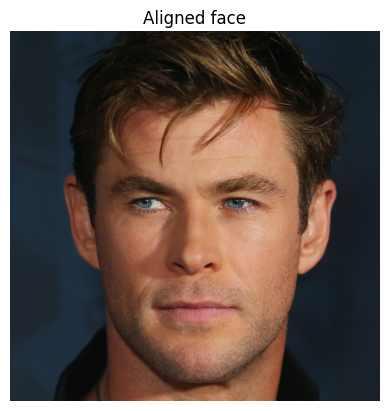

In [18]:
%matplotlib inline
display_image(aligned_face, title='Aligned face')

In [19]:
with torch.no_grad():
    model.eval()
    my_sample = model(my_w, input_is_latent=True)

/media/minhnhk/HDD/learn/jojogan_zombie/notebooks/../utils/op/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 2.6.0+cu126. Falling back to torch.nn.functional.conv2d().
  warnings.warn(


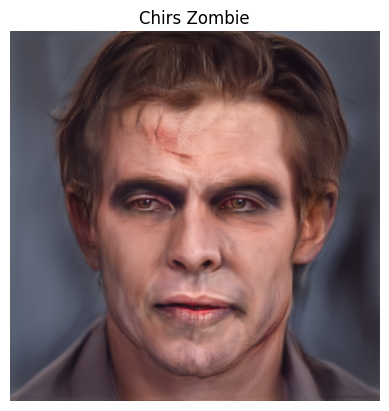

In [22]:
display_image(utils.make_grid(my_sample, normalize=True), title='Chirs Zombie')